## Introduction to Machine Learning with Titanic Dataset
### 1. What is Machine Learning 
- Computers being able to perform task with being explicitly programed.

### 2. Types of Machine Learning 
1. Supervised
2. Unsupervised
3. Reinforcement Learning
![image](img/typesOflearnign.png)

### 3. Problems we can solve using Machine Learning
![image](img/problemofml.png)
![image](img/rlscenario.png)


In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

## about libraries 

### 1.Pandas 
- Pandas takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called data frame that looks very similar to table in a statistical software like Excel
- https://pandas.pydata.org/docs/getting_started/index.html

### 2. Matplotlib and Seaborn
- Seaborn and Matplotlib are two of Python's most powerful visualization libraries. Seaborn uses fewer syntax and has stunning default themes and Matplotlib is more easily customizable through accessing the classes
- https://seaborn.pydata.org/
- https://matplotlib.org/

In [184]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [244]:
df = pd.read_csv("train.csv")

In [245]:
df.shape

(891, 12)

In [246]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [247]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
df.drop('Cabin',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [250]:
for col in df.columns:
    print(col,len(df[col].unique()))

PassengerId 891
Survived 2
Pclass 3
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Embarked 4


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [252]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,889
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,1601,NaN,S
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN


In [253]:
df.describe(include="O")

,Sex,Ticket,Embarked
count,891,891,889
unique,2,681,3
top,male,1601,S
freq,577,7,644


In [254]:
num_cols = df._get_numeric_data().columns
obj_cols = df.select_dtypes('object').columns

In [255]:
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [256]:
obj_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

In [257]:
people_survived = df[df['Survived']==1].shape[0]
people_died = df[df['Survived']==0].shape[0]
print(f'No. People survived titanic {people_survived}')
print(f'No. People died on titanic {people_died}')

No. People survived titanic 342
No. People died on titanic 549


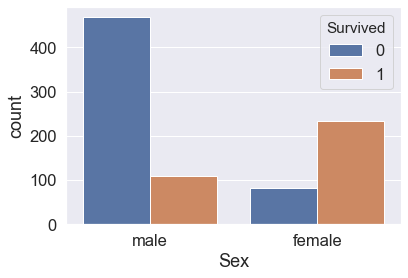

In [258]:
sns.countplot(x="Sex", hue='Survived' ,data=df)

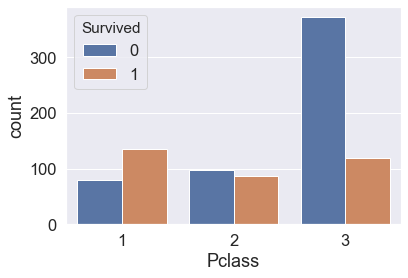

In [259]:
sns.countplot(x="Pclass", hue='Survived' ,data=df)

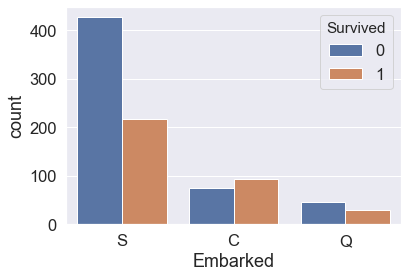

In [260]:
sns.countplot(x="Embarked", hue="Survived", data=df)

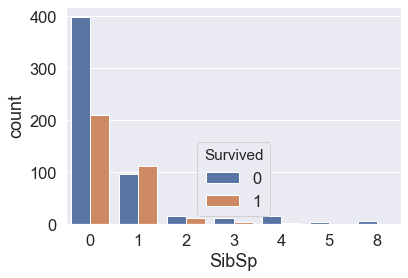

In [261]:
sns.countplot(x="SibSp", hue='Survived', data=df)

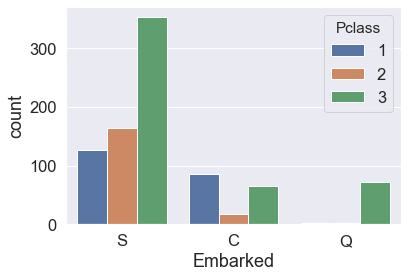

In [262]:
sns.countplot(x='Embarked',hue='Pclass',data=df)

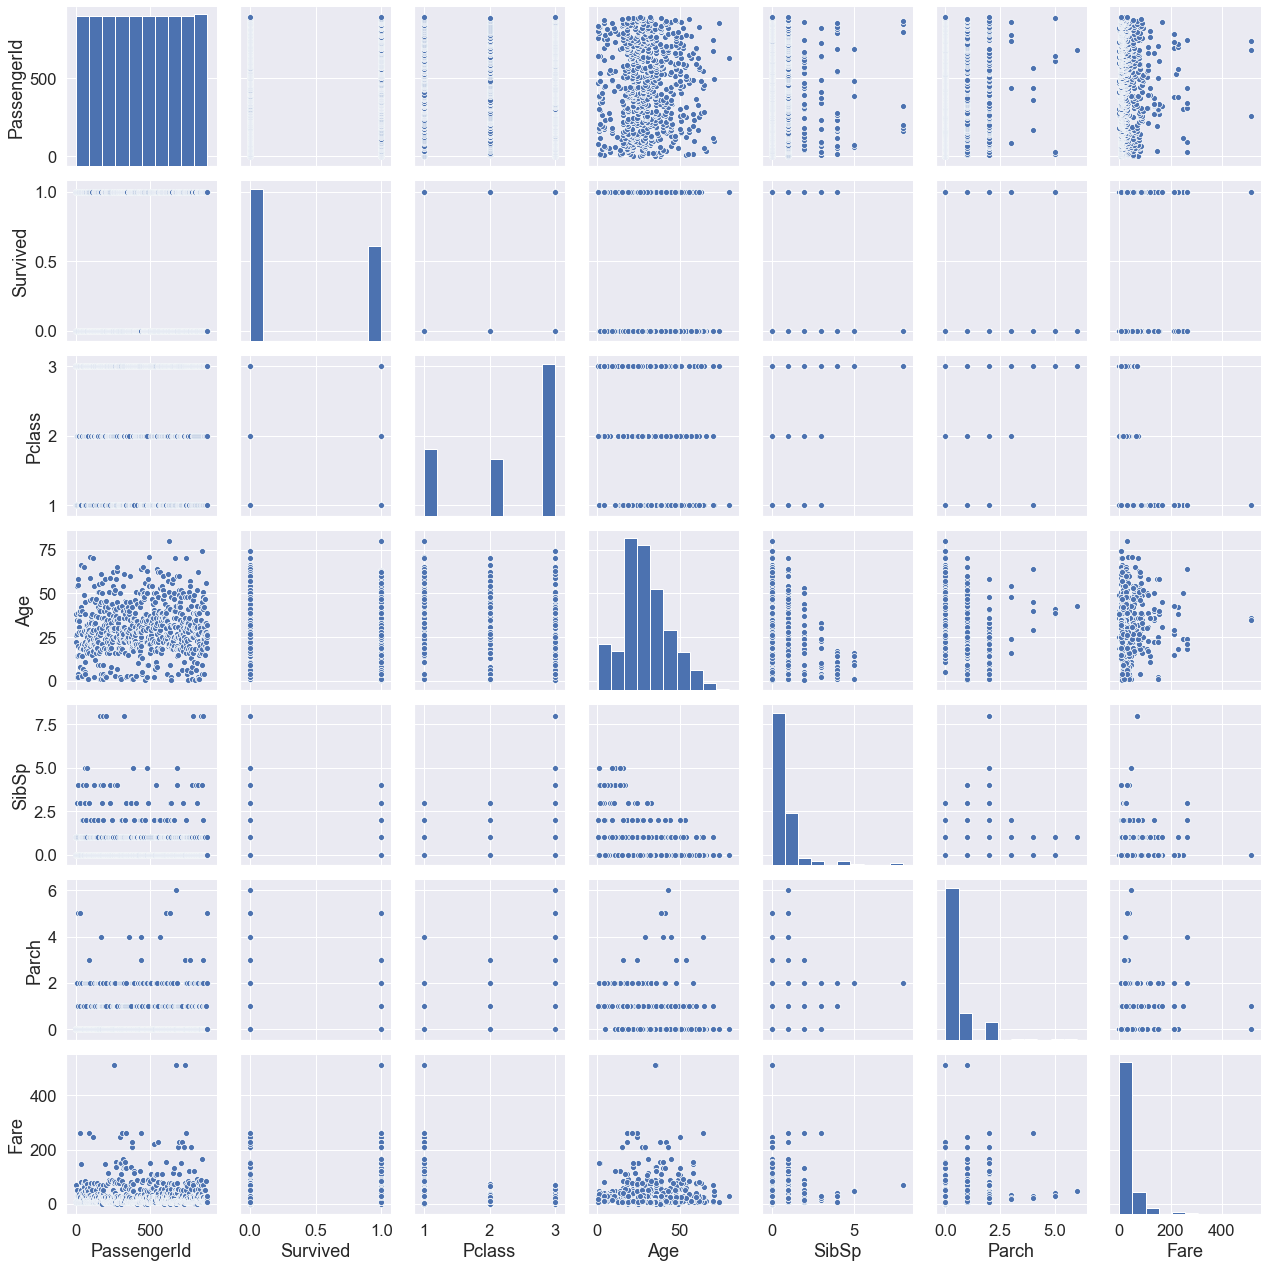

In [263]:
sns.pairplot(df)

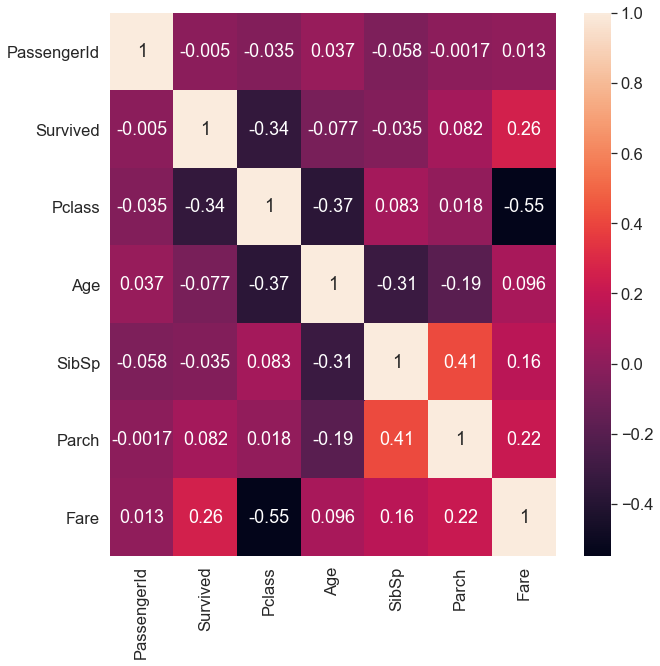

In [264]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.set(font_scale=1.5) 
sns.heatmap(df.corr(), annot=True,ax=ax)

### Data Cleaning

In [265]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [266]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [267]:
df['Embarked'].dtype

dtype('O')

### mode() returns an array 
- get mode()[0] first element of mode


In [268]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

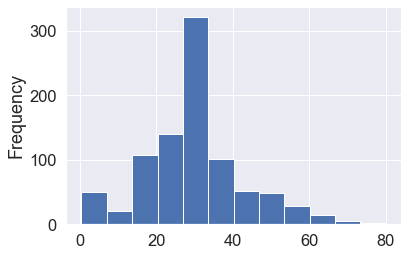

In [269]:
df['Age'].plot.hist(bins=12, alpha=1)

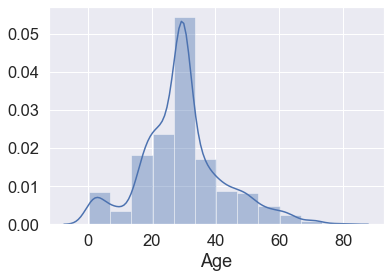

In [270]:
sns.distplot(df['Age'],bins=12)

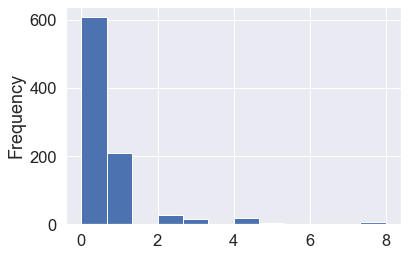

In [271]:
df['SibSp'].plot.hist(bins=12, alpha=1)

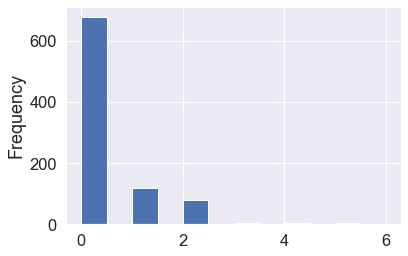

In [272]:
df['Parch'].plot.hist(bins=12, alpha=1)

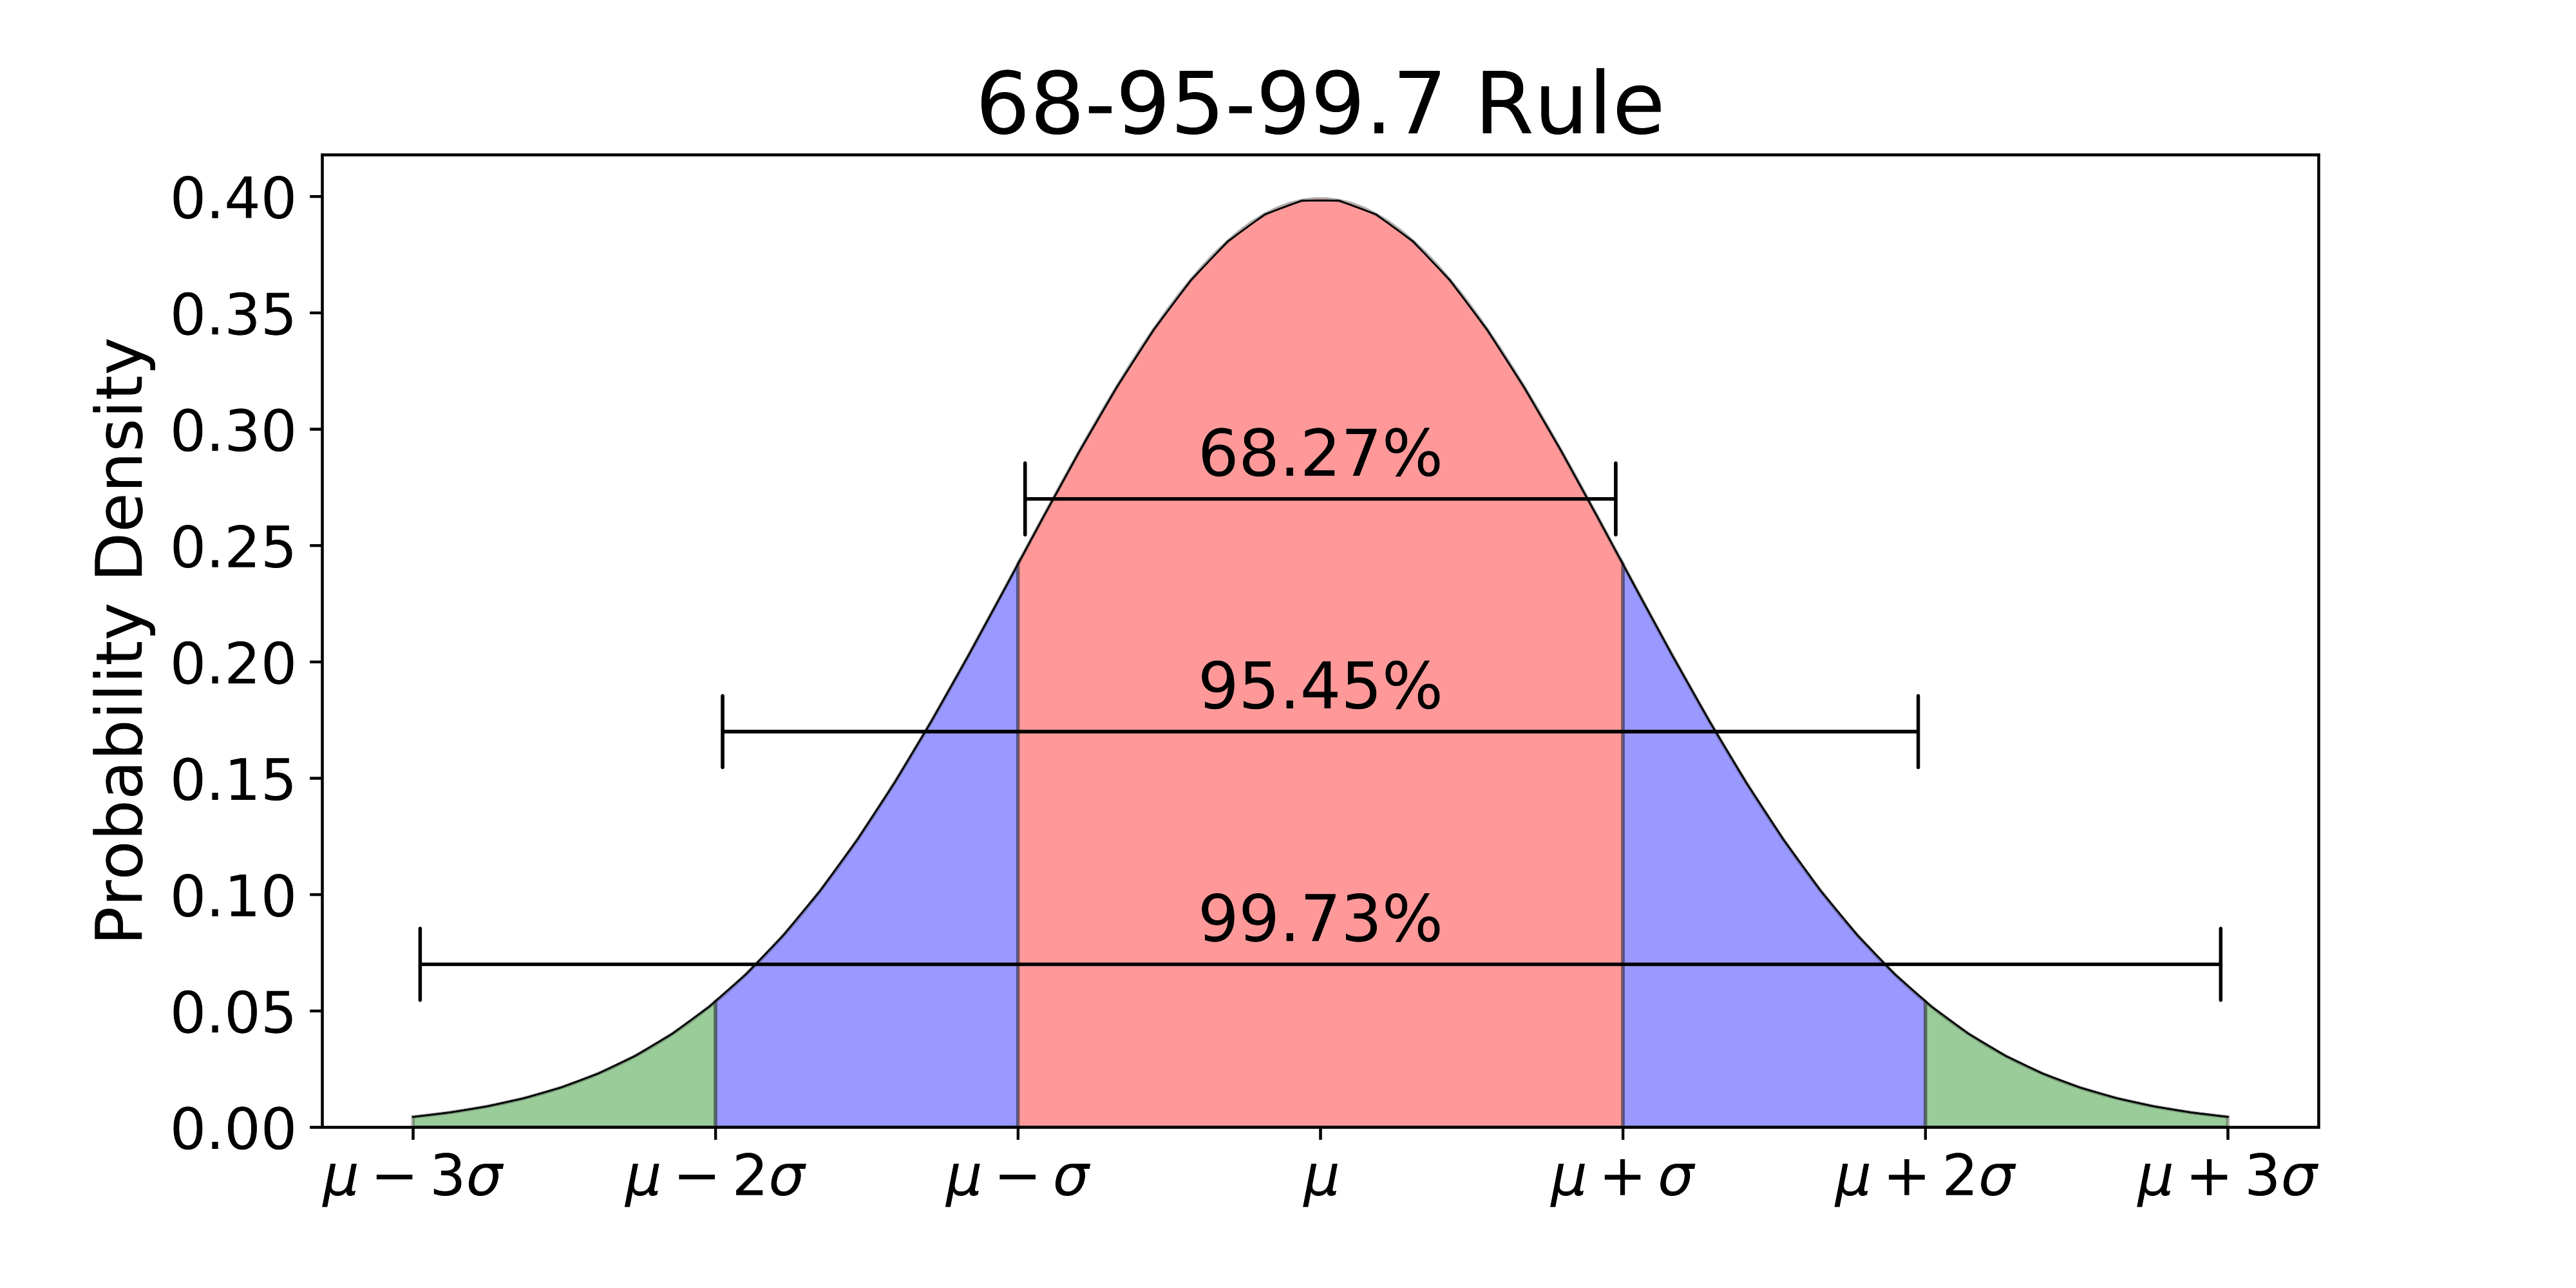

In [273]:
Image("img/distribution.png")

In [274]:
print(df.Age.mean())
print(df.Age.median())
print(df.Age.mode()[0])

29.699117647058763
29.69911764705882
29.69911764705882


In [275]:
print('Feature \t Mean \t Median \t Mode')
for i in num_cols:
    print(i,end='\t')
    print(df[i].mean(),end='\t')
    print(df[i].median(),end='\t')
    print(df[i].mode()[0])

Feature 	 Mean 	 Median 	 Mode
PassengerId	446.0	446.0	1
Survived	0.3838383838383838	0.0	0
Pclass	2.308641975308642	3.0	3
Age	29.699117647058763	29.69911764705882	29.69911764705882
SibSp	0.5230078563411896	0.0	0
Parch	0.38159371492704824	0.0	0
Fare	32.2042079685746	14.4542	8.05


In [359]:
df['zscore_age']=((df.Age-df.Age.mean())/df.Age.std())

In [360]:
df[(df['zscore_age']>3)|(df['zscore_age']<-3)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,zscore_age
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,C,3.176499
116,117,0,3,male,70.5,0,0,370369,7.7500,Q,3.138043
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,C,3.176499
630,631,1,1,male,80.0,0,0,27042,30.0000,S,3.868699
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,S,3.099587
745,746,0,1,male,70.0,1,1,WE/P 5735,71.0000,S,3.099587
851,852,0,3,male,74.0,0,0,347060,7.7750,S,3.407232


In [361]:
df_clean = df.drop(df[(df.zscore_age>3)|(df.zscore_age<-3)].index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fee8f83688>,
 'caps': [<matplotlib.lines.Line2D at 0x1fee8f8afc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fee8ab6b88>],
 'medians': [<matplotlib.lines.Line2D at 0x1fee8f90ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fee8f90fc8>],
 'means': []}

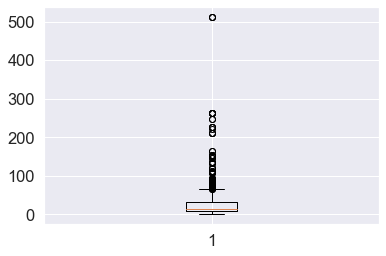

In [362]:
plt.boxplot(df_clean.Fare)

In [363]:
from numpy import percentile
q25, q75 = percentile(df_clean.Fare, 25), percentile(df_clean.Fare, 75)
iqr = q75 - q25
print(q25,q75,iqr)

In [364]:
cut_off = iqr * 2.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in df_clean.Fare if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df_clean.Fare if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

In [365]:
df_clean.drop(df_clean[(df_clean.Fare>upper)|(df_clean.Fare<lower)].index,axis=0,inplace=True)
df_clean.shape

{'whiskers': [<matplotlib.lines.Line2D at 0x1fee8fdff48>,
 'caps': [<matplotlib.lines.Line2D at 0x1fee8fe6bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fee8fad088>],
 'medians': [<matplotlib.lines.Line2D at 0x1fee8fed788>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fee8fedd88>],
 'means': []}

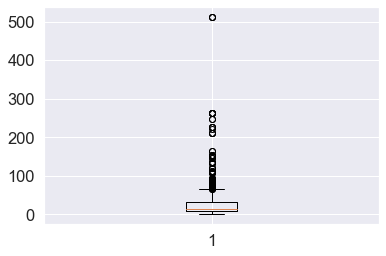

In [366]:
plt.boxplot(df_clean.Fare)

In [368]:
def binary_encoder(data):
    if data == 'female':
        return 0
    else :
        return 1

In [369]:
df_clean['Sex']=df_clean['Sex'].apply(binary_encoder)

In [370]:
df_clean['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 884, dtype: int64

In [371]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_clean['Ticket'] = encoder.fit_transform(df_clean['Ticket'])


In [372]:
df_clean['Ticket']

0      520
1      592
2      663
3       49
4      469
      ... 
886    101
887     14
888    669
889      8
890    463
Name: Ticket, Length: 884, dtype: int32

In [373]:
pass_id = df_clean['PassengerId']
X = df_clean[['Age','Fare','Sex','Ticket','Embarked','SibSp','Parch']]
y = df_clean['Survived']

In [375]:
dummies = pd.get_dummies(X['Embarked'])

In [376]:
dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [377]:
X.drop('Embarked',axis=1,inplace=True)

In [378]:
cols = dummies.columns

In [379]:
X[cols]=dummies

In [380]:
X

,Age,Fare,Sex,Ticket,SibSp,Parch,C,Q,S
0,22.000000,7.2500,1,520,1,0,0,0,1
1,38.000000,71.2833,0,592,1,0,1,0,0
2,26.000000,7.9250,0,663,0,0,0,0,1
3,35.000000,53.1000,0,49,1,0,0,0,1
4,35.000000,8.0500,1,469,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,1,101,0,0,0,0,1
887,19.000000,30.0000,0,14,0,0,0,0,1
888,29.699118,23.4500,0,669,1,2,0,0,1
889,26.000000,30.0000,1,8,0,0,1,0,0


In [410]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2048,stratify=y)

In [411]:
from sklearn.preprocessing import StandardScaler

In [412]:
X_train.shape[0] == y_train.shape[0]

True

In [413]:
def apply_model(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)   
    print('Unscaled data result')
    print(accuracy_score(y_test,predictions))
    scaler = StandardScaler()
    X_train[cols] = scaler.fit(X_train[cols].values).transform(X_train[cols].values)
    X_test[cols]  =  scaler.fit(X_test[cols].values).transform(X_test[cols].values)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)   
    print('Scaled data result')
    print(accuracy_score(y_test,predictions))


In [414]:
from sklearn.linear_model import LogisticRegression

In [415]:
clf = LogisticRegression(max_iter=200)
apply_model(clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.7853107344632768
Scaled data result
0.7853107344632768


In [416]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5)
apply_model(tree_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.8248587570621468
Scaled data result
0.8248587570621468


In [417]:
# from sklearn import tree
# fig = plt.figure(figsize=(100,150))
# _ = tree.plot_tree(tree_clf, 
#                    feature_names=X.columns,  
#                    class_names='Survived',
#                    filled=True)


In [418]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=150)

apply_model(rf_clf,X_train,X_test,y_train,y_test)

Unscaled data result
0.8022598870056498
Scaled data result
0.8192090395480226


In [419]:
test = pd.read_csv("test.csv")

In [420]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [421]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [422]:
pass_id = test['PassengerId']
X_test = test[['Age','Fare','Sex','Ticket','Embarked','SibSp','Parch']]
X_test['Ticket'] =encoder.fit_transform(X_test['Ticket'])


In [423]:
X_test.Fare.fillna(X.Fare.mean(),inplace=True)

In [424]:
X_test.Age.fillna(X.Age.mean(),inplace=True)

In [425]:
X_test.isnull().sum()

Age         0
Fare        0
Sex         0
Ticket      0
Embarked    0
SibSp       0
Parch       0
dtype: int64

In [426]:
X_test['Sex'] = X_test['Sex'].apply(binary_encoder)
X_test.head()

,Age,Fare,Sex,Ticket,Embarked,SibSp,Parch
0,34.5,7.8292,1,152,Q,0,0
1,47.0,7.0000,0,221,S,1,0
2,62.0,9.6875,1,73,Q,0,0
3,27.0,8.6625,1,147,S,0,0
4,22.0,12.2875,0,138,S,1,1


In [427]:
dummies = pd.get_dummies(df['Embarked'])
X_test.drop('Embarked',axis=1,inplace=True)
X_test[dummies.columns]=dummies

In [428]:
X_test.fillna(0,inplace=True)

In [429]:
X_test

,Age,Fare,Sex,Ticket,SibSp,Parch,C,Q,S
0,34.500000,7.8292,1,152,0,0,0,0,1
1,47.000000,7.0000,0,221,1,0,1,0,0
2,62.000000,9.6875,1,73,0,0,0,0,1
3,27.000000,8.6625,1,147,0,0,0,0,1
4,22.000000,12.2875,0,138,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
413,29.361328,8.0500,1,267,0,0,0,0,1
414,39.000000,108.9000,0,324,0,0,0,0,1
415,38.500000,7.2500,1,346,0,0,0,0,1
416,29.361328,8.0500,1,220,0,0,0,0,1


In [430]:
prediction = rf_clf.predict(X_test)

In [431]:
len(prediction)==len(pass_id)

True

In [432]:
results = pd.DataFrame()
results['PassengerId']=pass_id.values
results['Survived']=prediction
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [433]:
results.to_csv('results.csv',index=None)

## Learning Resources 

### MOOC 
1. https://www.coursera.org/learn/ai-for-everyone
    - by Andrew Ng
2. https://www.coursera.org/learn/machine-learning
    - by Andrew Ng
3. https://www.coursera.org/learn/what-is-datascience 
    - Alex Aklson and Polong Lin

### Youtube
1. StatQuest with Josh Starmer 
    - https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw
2. 3blue1brown
    - https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw
3. Codebasics
    - https://www.youtube.com/c/codebasics/